<div class="alert alert-block alert-success">
    
# FIT5149 Assignment 1
#### Student Name: Muhammad Bilal Elahi
#### Student ID: 34200223
#### Group Number: 054
    
    
Date: 3/09/2024


Environment: Python 3.12.5

    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
$\;\;\;\;$[1.1. Background](#background) <br>
$\;\;\;\;$[1.2. Objectives](#objectives) <br>
[2. Importing Libraries](#libs) <br>
$\;\;\;\;$[2.1. Mounting Google Drive](#mount_drive) <br>
[3. Examining Patent Files](#examine) <br>
$\;\;\;\;$[3.1. Input File Observations](#inp_obs) <br>
[4. Loading and Parsing Files](#load) <br>
$\;\;\;\;$[4.1. Defining Regular Expressions](#Reg_Exp) <br>
$\;\;\;\;$[4.2. Reading File](#Read) <br>
$\;\;\;\;$[4.3. Creating Assignment Dictionary](#dict) <br>
$\;\;\;\;\;\;\;\;$[4.3.1. Global Variables](#var) <br>
$\;\;\;\;\;\;\;\;$[4.3.2. Functions](#func) <br>
$\;\;\;\;\;\;\;\;$[4.3.3. Loop for parsing](#loop) <br>
$\;\;\;\;$[4.4. Converting into JSON](#json_conv) <br>
[5. Writing to JSON File](#json_write) <br>
$\;\;\;\;$[5.1. Verification of JSON file](#json_veri) <br>
[6. Summary](#summary) <br>
[7. References](#Ref) <br>

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

<div class="alert alert-block alert-info">
    
### 1.1. Background <a class="anchor" name="background"></a>

<div class="alert alert-block alert-info">
    
### 1.2. Objectives <a class="anchor" name="objectives"></a>

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

<div class="alert alert-block alert-warning">

## 3.  Examining Raw Data <a class="anchor" name="examine"></a>

 </div>

<div class="alert alert-block alert-info">
    
### 3.1. Input File Observations <a class="anchor" name="inp_obs"></a>

<div class="alert alert-block alert-warning"> 

## 4.  Data Exploration and Preprocessing <a class="anchor" name="load"></a>

</div>

<div class="alert alert-block alert-info">
    
### 4.1. Reading File <a class="anchor" name="Read"></a>

In this step we will reading the input file naming `A1_stock_volatility_labeled.csv` from our local repository.

In [36]:
import pandas as pd
import warnings

# Load the dataset
file_path = 'A1_stock_volatility_labeled.csv'
data = pd.read_csv(file_path)

<div class="alert alert-block alert-info">
    
### 4.2. Exploratory analysis <a class="anchor" name="Read"></a>

In [37]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Stock
0,2022-01-01,164.634,144.954,165.074,136.849,40101533,5.732915e+09,148.347000,-12.188473,1.795721,...,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,-79000000.0,-546000000.0,A
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,...,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,-79000000.0,-546000000.0,A
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,9.100000e+08,0.94,1.033000e+10,5.173000e+09,5.154000e+09,1.113000e+09,255000000.0,-79000000.0,-546000000.0,A
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,-155000000.0,-669000000.0,A
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,1.771000e+09,1.86,1.046000e+10,5.333000e+09,5.122000e+09,1.186000e+09,538000000.0,-155000000.0,-669000000.0,A


1. Dataset Overview:

- The dataset contains 22 columns and 13,486 rows.

- Date and Stock are categorical variables.
 
- Other columns are primarily numerical and represent various financial metrics and trading data

In [38]:
# Display the summary of the dataset
data.describe(include='all')

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow,Stock
count,13486,13486.000000,13486.000000,13486.000000,13486.000000,1.348600e+04,1.348600e+04,13486.000000,13486.000000,13486.000000,...,1.348600e+04,13486.000000,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,1.348600e+04,13486
unique,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,613
top,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
freq,613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
mean,NaN,1741.328666,1735.367690,1829.655853,1637.911281,4.112382e+07,3.228092e+09,1733.197353,-0.700045,2.396125,...,2.857836e+09,1.949710,1.821612e+10,1.091715e+10,7.298849e+09,1.510022e+09,1.178012e+09,-7.025812e+08,-4.600039e+08,NaN
std,NaN,15564.852252,15628.651843,16210.989075,14950.536329,1.211088e+08,1.660591e+10,15573.457915,13.110310,2.033964,...,1.130077e+10,5.161378,5.717197e+10,3.217662e+10,2.944286e+10,7.989450e+09,5.928045e+09,3.328101e+09,3.485262e+09,NaN
min,NaN,0.011000,0.010000,0.011000,0.008000,4.210000e+02,1.746700e+04,0.010455,-84.347826,0.000000,...,-2.746000e+09,-84.600000,1.410000e+07,2.479000e+06,-8.940000e+09,4.300000e+04,-4.109000e+09,-7.097000e+10,-6.976000e+10,NaN
25%,NaN,22.710000,22.330000,24.750000,20.180000,3.879474e+06,1.125653e+08,22.486262,-6.911791,1.345456,...,1.013000e+08,-0.050000,7.990500e+08,3.497000e+08,2.705000e+08,5.024000e+07,5.240000e+05,-2.515500e+08,-2.350000e+08,NaN
50%,NaN,87.560000,86.645000,93.975000,81.372500,1.145391e+07,4.743543e+08,87.345952,-1.090276,1.980023,...,4.060000e+08,0.990000,2.858000e+09,1.556000e+09,9.840000e+08,1.861000e+08,8.319000e+07,-4.824000e+07,-2.264000e+07,NaN
75%,NaN,356.460000,352.652750,377.180000,325.060000,3.204557e+07,2.097197e+09,351.217239,4.979387,3.001239,...,1.422000e+09,2.860000,9.482000e+09,6.084000e+09,3.111000e+09,5.940000e+08,4.441500e+08,-6.422000e+06,7.465000e+06,NaN


2. First Few Rows of the Dataset:

- The dataset includes trading data such as Open, Close, High, Low prices, and Volume, as well as financial data such as Revenue, Net Income, Gross Profit, EPS, etc.

- The target variable for prediction is Volatility, which is a measure of price variability.

In [39]:
# Check for missing values
data.isnull().sum()

Date                         0
Open                         0
Close                        0
High                         0
Low                          0
Volume                       0
Amount                       0
Avg_Price                    0
Return                       0
Volatility                   0
Revenue                      0
Net Income                   0
Gross Profit                 0
EPS                          0
Total Assets                 0
Total Liabilities            0
Total Equity                 0
Cash and Cash Equivalents    0
Operating Cash Flow          0
Investing Cash Flow          0
Financing Cash Flow          0
Stock                        0
dtype: int64

3. Summary Statistics:

- The summary statistics provide an overview of the numerical data distribution.

- No missing values were detected in the dataset.

In [40]:
# Get the data types of each column
data.dtypes

Date                          object
Open                         float64
Close                        float64
High                         float64
Low                          float64
Volume                         int64
Amount                       float64
Avg_Price                    float64
Return                       float64
Volatility                   float64
Revenue                      float64
Net Income                   float64
Gross Profit                 float64
EPS                          float64
Total Assets                 float64
Total Liabilities            float64
Total Equity                 float64
Cash and Cash Equivalents    float64
Operating Cash Flow          float64
Investing Cash Flow          float64
Financing Cash Flow          float64
Stock                         object
dtype: object

4. Data Types:

- Most columns are float64, representing continuous numerical data.

- Date and Stock are object (categorical) types.

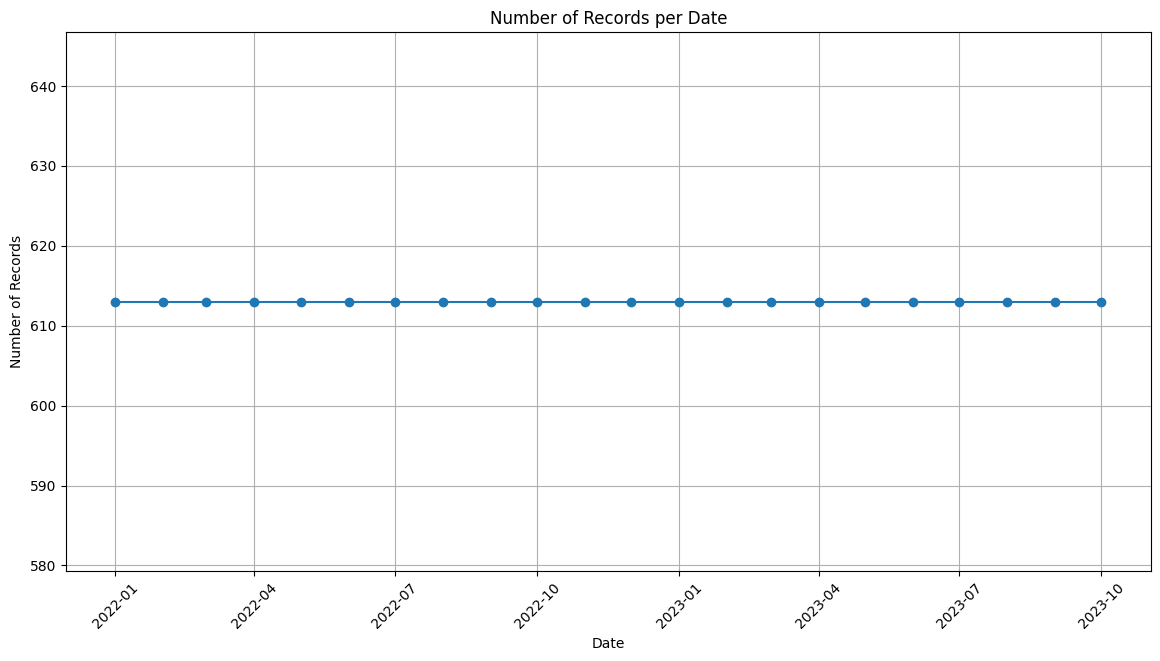

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Explore the temporal nature of the data
# Group by Date to see if there is any pattern over time in terms of data availability
temporal_grouping = data.groupby('Date').size()

# Plot the temporal distribution
plt.figure(figsize=(14, 7))
plt.plot(temporal_grouping, marker='o')
plt.title('Number of Records per Date')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1. Temporal Distribution:

- It appears that the dataset is structured with consistent entries across each date, indicating regular updates (likely monthly).

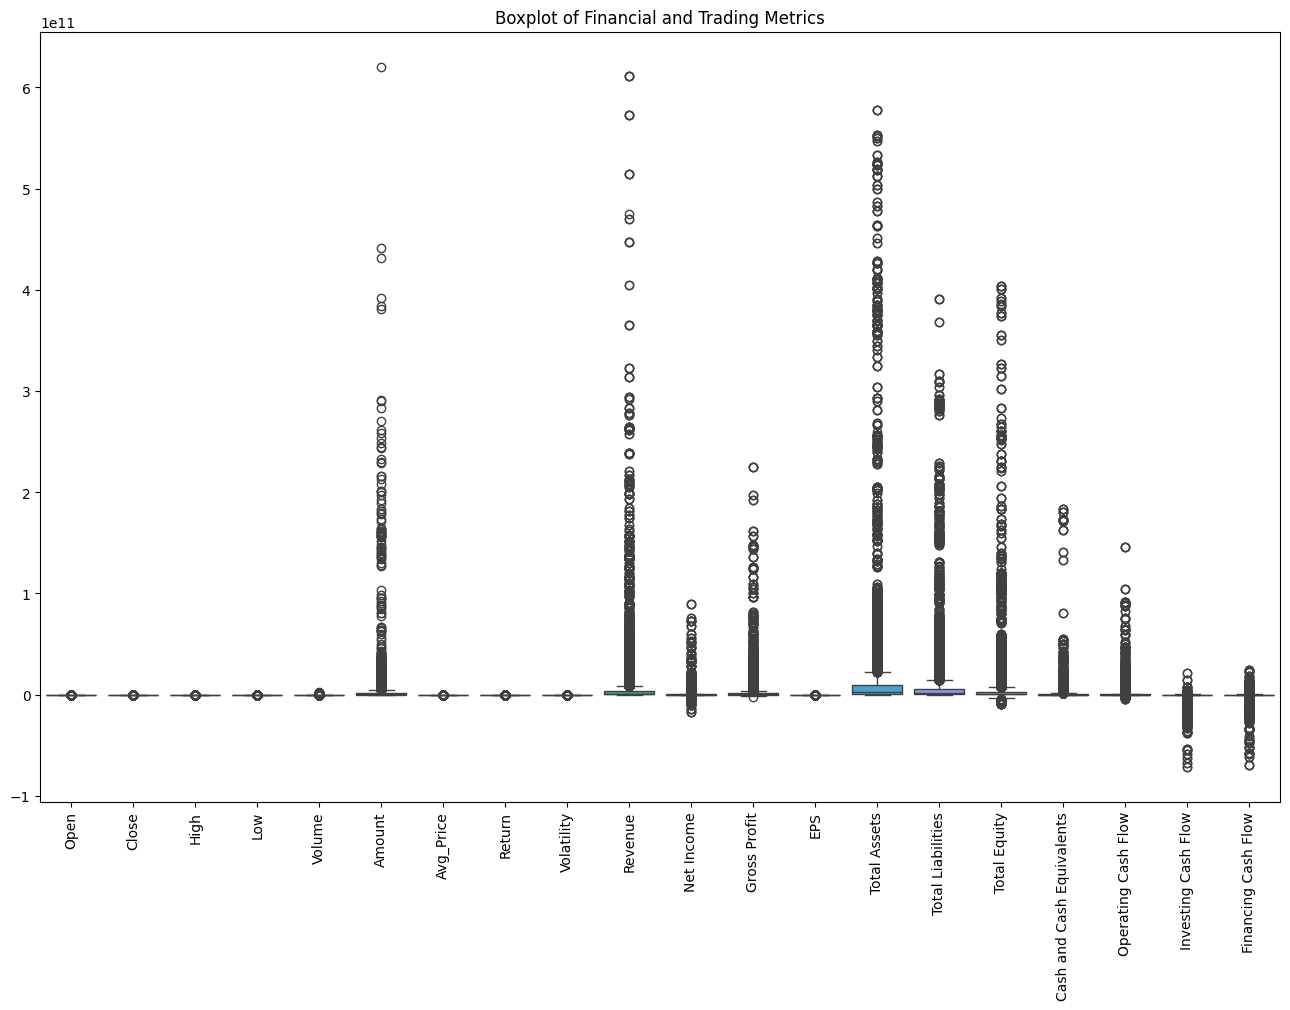

In [42]:
# Visualize the distributions of key financial and trading metrics to check for outliers and irregularities
plt.figure(figsize=(16, 10))
sns.boxplot(data=data.drop(columns=['Date', 'Stock']))
plt.title('Boxplot of Financial and Trading Metrics')
plt.xticks(rotation=90)
plt.show()

2. Outliers and Irregularities:

- The boxplot highlights potential outliers in several financial and trading metrics. Some features show significant variability.

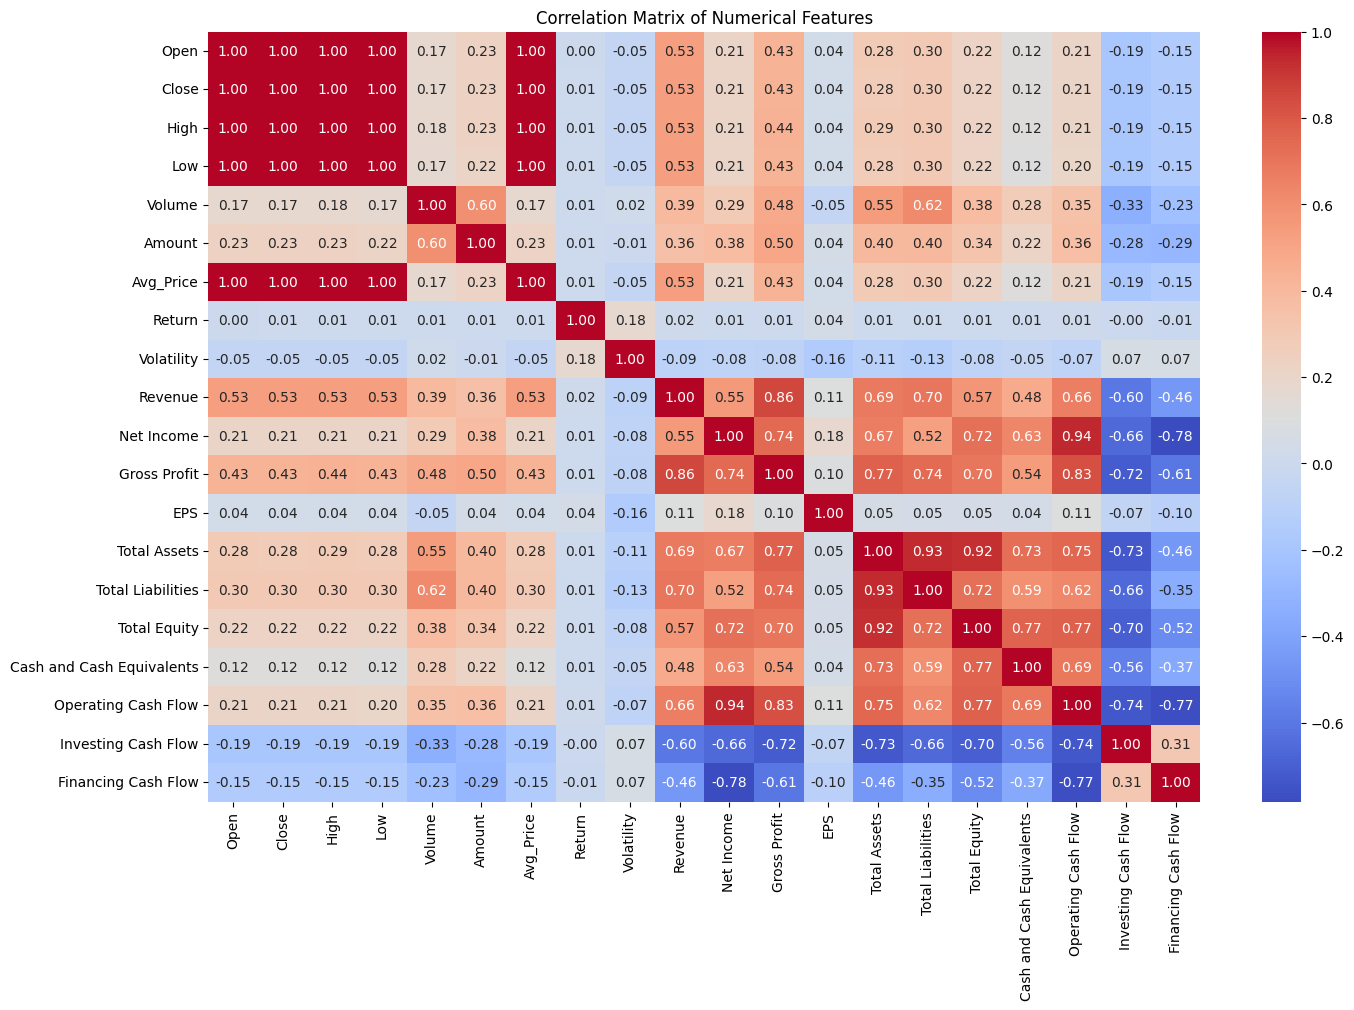

In [43]:
# Filter the DataFrame to include only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

3. Correlation Analysis:

- The heatmap of the correlation matrix reveals relationships between the various features.

 - Notable correlations:
    
    - Strong correlations among financial metrics such as Assests, Liabilities, and Total Equity.
    
    - Trading metrics such as Open, Close, High, Low, and Average Prices are also strongly correlated.

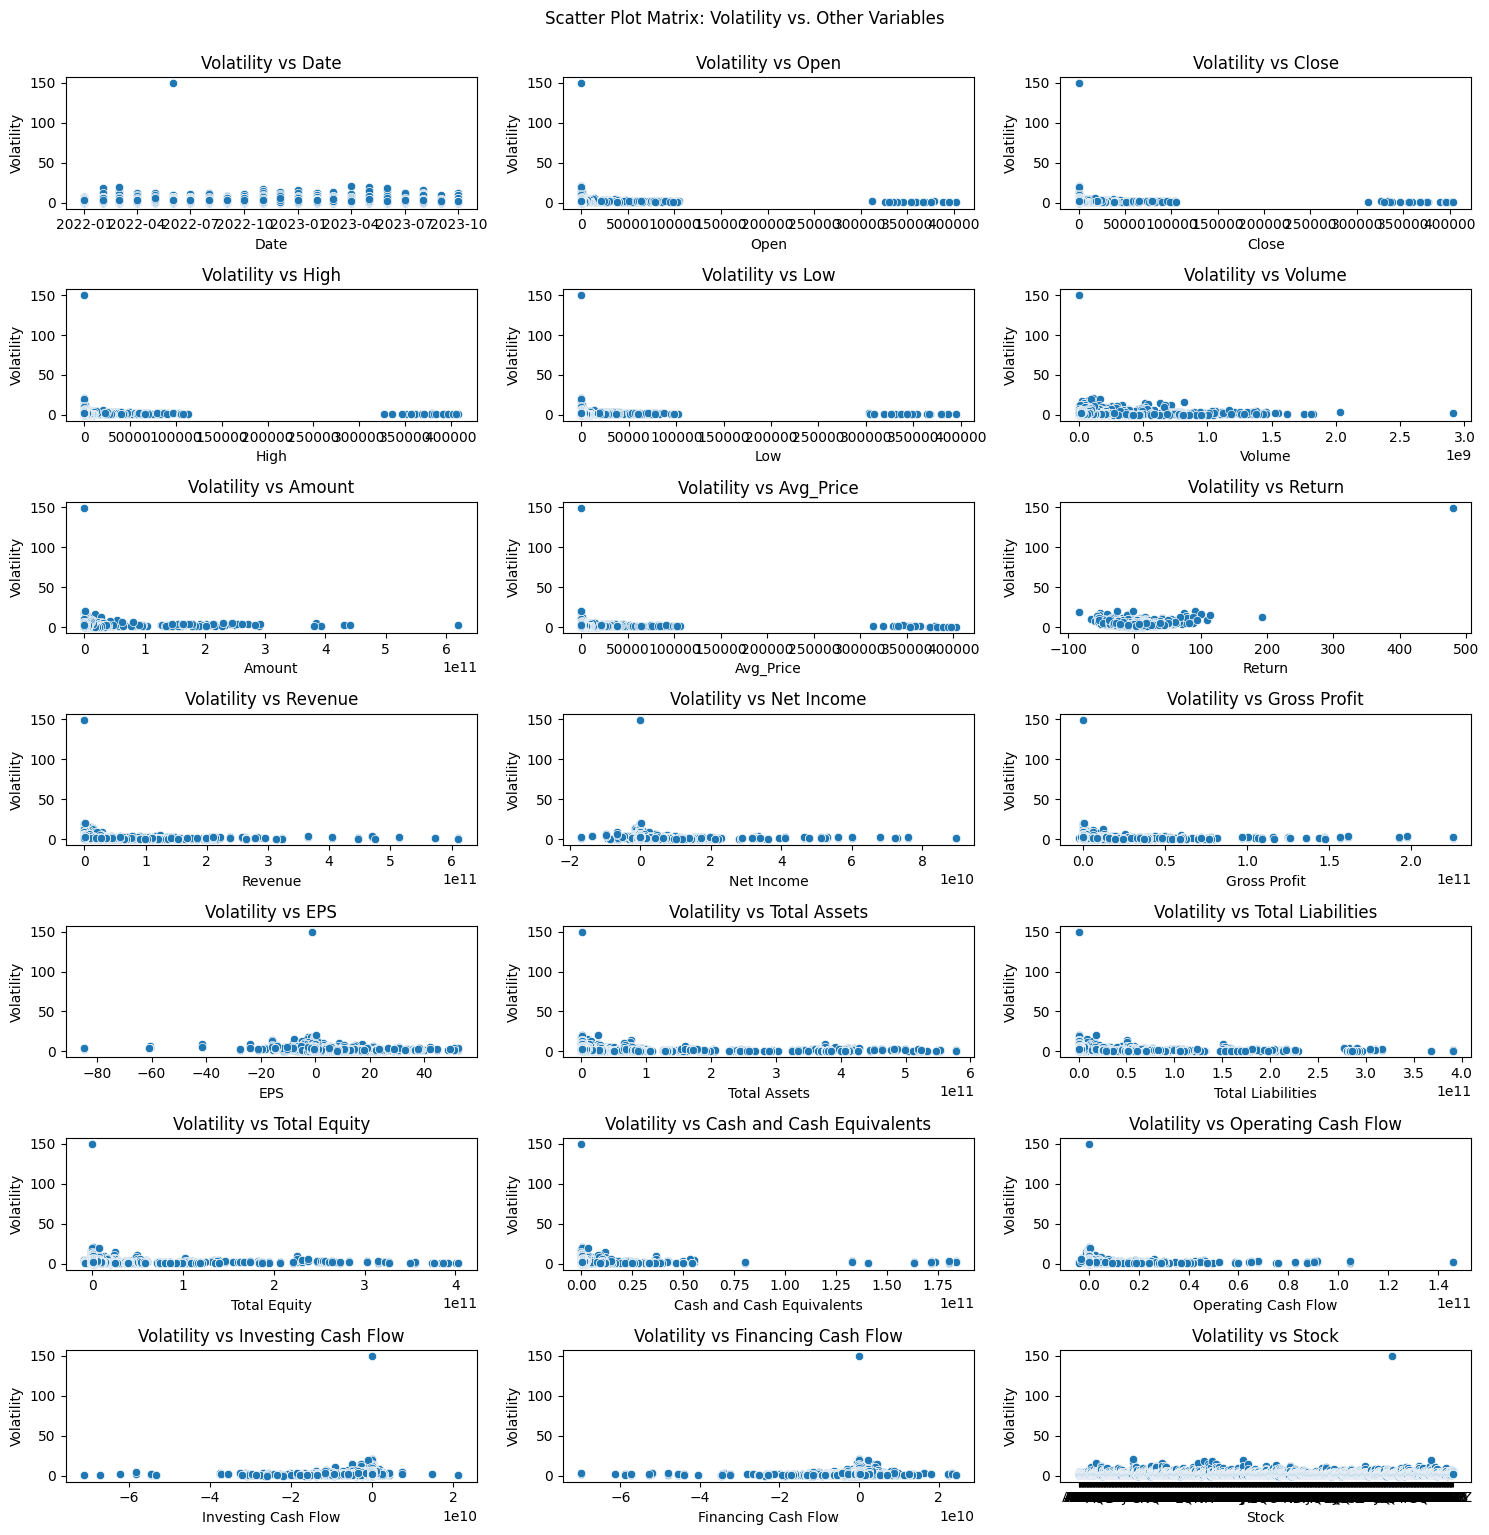

In [44]:
# Define the target variable
target_variable = 'Volatility'

# Filter the numerical columns excluding the target variable
numerical_columns = data.columns.drop(target_variable)

# Define the number of rows and columns for the grid
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate scatter plots
for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=data[col], y=data[target_variable], ax=axes[i])
    axes[i].set_title(f'{target_variable} vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target_variable)

# Remove any empty subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.suptitle('Scatter Plot Matrix: Volatility vs. Other Variables', y=1.02)
plt.show()

C:\Users\bilal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


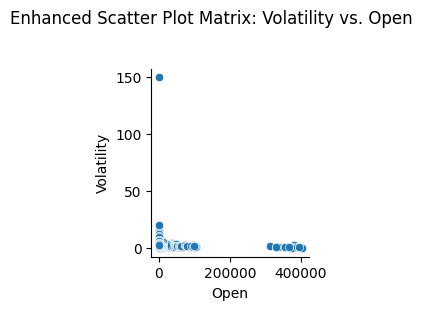

In [45]:
# Create a scatter plot matrix with 'Volatility' against all other variables, colored by 'Stock'
sns.pairplot(data, y_vars=['Volatility'], x_vars=['Open'], palette='coolwarm', height=2.5)

# Adjust the plot for better readability
plt.suptitle('Enhanced Scatter Plot Matrix: Volatility vs. Open', y=1.2)
plt.show()

In [46]:
# Display summary statistics of the 'Volatility' column
data['Volatility'].describe()

count    13486.000000
mean         2.396125
std          2.033964
min          0.000000
25%          1.345456
50%          1.980023
75%          3.001239
max        149.476478
Name: Volatility, dtype: float64

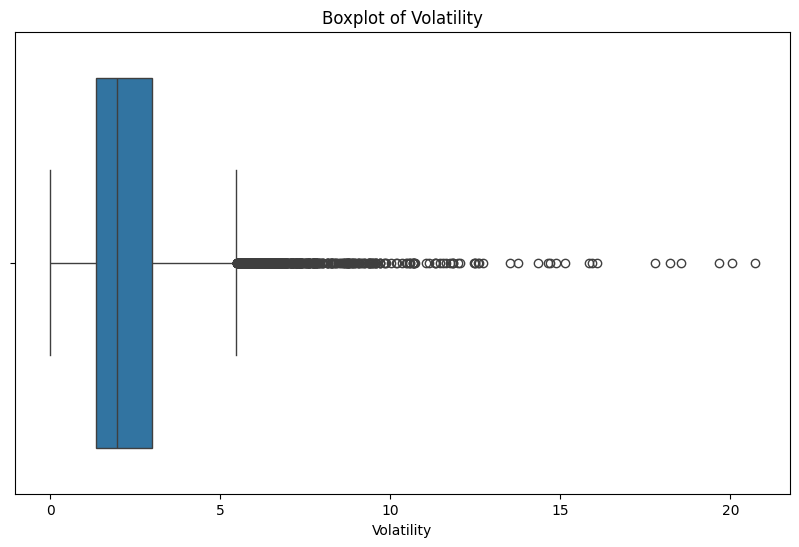

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Volatility'])
plt.title('Boxplot of Volatility')
plt.show()

<div class="alert alert-block alert-info">
    
### 4.3. Outlier Removal <a class="anchor" name="Read"></a>

In [47]:
# Remove the outlier from the dataset
data_1 = data[data['Volatility'] <= 140]

# Check if the outlier has been removed
data_1.describe()

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Net Income,Gross Profit,EPS,Total Assets,Total Liabilities,Total Equity,Cash and Cash Equivalents,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
count,13485,13485.000000,13485.000000,13485.000000,13485.000000,1.348500e+04,1.348500e+04,13485.000000,13485.000000,13485.000000,...,1.348500e+04,1.348500e+04,13485.000000,1.348500e+04,1.348500e+04,1.348500e+04,1.348500e+04,1.348500e+04,1.348500e+04,1.348500e+04
mean,2022-11-15 13:23:20.756396032,1741.457794,1735.496364,1829.791515,1638.032740,4.112671e+07,3.228331e+09,1733.325875,-0.735692,2.385218,...,7.171972e+08,2.858047e+09,1.949954,1.821746e+10,1.091795e+10,7.299389e+09,1.510134e+09,1.178100e+09,-7.026334e+08,-4.600378e+08
min,2022-01-01 00:00:00,0.011000,0.010000,0.011000,0.008000,4.210000e+02,1.746700e+04,0.010455,-84.347826,0.000000,...,-1.672000e+10,-2.746000e+09,-84.600000,1.410000e+07,2.479000e+06,-8.940000e+09,4.300000e+04,-4.109000e+09,-7.097000e+10,-6.976000e+10
25%,2022-06-01 00:00:00,22.710000,22.330000,24.750000,20.180000,3.882298e+06,1.125695e+08,22.499048,-6.912480,1.345397,...,-6.500000e+05,1.013000e+08,-0.050000,8.001000e+08,3.497000e+08,2.705000e+08,5.024000e+07,5.240000e+05,-2.516000e+08,-2.350000e+08
50%,2022-12-01 00:00:00,87.570000,86.650000,93.980000,81.395000,1.145424e+07,4.744810e+08,87.372381,-1.091008,1.979925,...,6.013000e+07,4.060000e+08,0.990000,2.858000e+09,1.556000e+09,9.851000e+08,1.861000e+08,8.319000e+07,-4.824000e+07,-2.264000e+07
75%,2023-05-01 00:00:00,356.520000,352.720000,377.200000,325.080000,3.204558e+07,2.097368e+09,351.293895,4.978386,3.000901,...,3.140000e+08,1.422000e+09,2.860000,9.482000e+09,6.084000e+09,3.111000e+09,5.940000e+08,4.442000e+08,-6.422000e+06,7.465000e+06
max,2023-10-01 00:00:00,402207.744000,403313.664000,408310.579000,394660.864000,2.908660e+09,6.206421e+11,402330.624000,192.222222,20.712825,...,8.948000e+10,2.252000e+11,52.470000,5.772000e+11,3.906000e+11,4.035000e+11,1.837000e+11,1.459000e+11,2.138000e+10,2.425000e+10
std,NaN,15565.422178,15629.224214,16211.582528,14951.084046,1.211129e+08,1.660651e+10,15574.028231,12.440052,1.591502,...,3.993596e+09,1.130116e+10,5.161492,5.717387e+10,3.217768e+10,2.944389e+10,7.989736e+09,5.928256e+09,3.328219e+09,3.485389e+09


<div class="alert alert-block alert-warning"> 

## 5. Feature Extraction  <a class="anchor" name="load"></a>

</div>


<div class="alert alert-block alert-info">
    
### 5.1. Creating Lagged Variables <a class="anchor" name="Read"></a>

Lagged variables are previous values of a time-series feature that can be used to predict future values. We will be creating lagged versions of features like Open, Close, High, Low, Volume, etc., to capture temporal dependencies.

In [48]:
# Ignore all warnings
warnings.filterwarnings('ignore')

# Creating lagged features for the trading data
lagged_features = ['Open', 'Close', 'High', 'Low', 'Volume', 'Amount', 'Avg_Price', 'Return']

# Create lagged features for each stock separately
for feature in lagged_features:
    data_1[f'{feature}_lag1'] = data_1.groupby('Stock')[feature].shift(1)

C:\Users\bilal\AppData\Local\Temp\ipykernel_26304\3391928144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1[f'{feature}_lag1'] = data_1.groupby('Stock')[feature].shift(1)
C:\Users\bilal\AppData\Local\Temp\ipykernel_26304\3391928144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1[f'{feature}_lag1'] = data_1.groupby('Stock')[feature].shift(1)
C:\Users\bilal\AppData\Local\Temp\ipykernel_26304\3391928144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [50]:
data_1.head()

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Financing Cash Flow,Stock,Open_lag1,Close_lag1,High_lag1,Low_lag1,Volume_lag1,Amount_lag1,Avg_Price_lag1,Return_lag1
0,2022-01-01,164.634,144.954,165.074,136.849,40101533,5.732915e+09,148.347000,-12.188473,1.795721,...,-546000000.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,...,-546000000.0,A,164.634,144.954,165.074,136.849,40101533.0,5.732915e+09,148.347000,-12.188473
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,-546000000.0,A,146.164,135.994,150.734,128.694,42313071.0,5.677741e+09,141.947684,-6.181271
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,-669000000.0,A,136.464,137.964,145.834,132.534,46251907.0,6.205439e+09,139.889217,1.448593
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,-669000000.0,A,139.814,125.114,142.924,123.084,43916920.0,5.566595e+09,132.867500,-9.314024


In [70]:
# Drop rows with any NaN values
data_cleaned = data_1.dropna()

# Verify that all NaN values have been removed
nan_count_after = data_cleaned.isna().sum().sum()
print(f'Number of NaN values after cleaning: {nan_count_after}')

# Display the cleaned dataset
data_cleaned.head()

Number of NaN values after cleaning: 0


,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Financing Cash Flow,Stock,Open_lag1,Close_lag1,High_lag1,Low_lag1,Volume_lag1,Amount_lag1,Avg_Price_lag1,Return_lag1
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,...,-546000000.0,A,164.634,144.954,165.074,136.849,40101533.0,5.732915e+09,148.347000,-12.188473
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,-546000000.0,A,146.164,135.994,150.734,128.694,42313071.0,5.677741e+09,141.947684,-6.181271
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,-669000000.0,A,136.464,137.964,145.834,132.534,46251907.0,6.205439e+09,139.889217,1.448593
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,-669000000.0,A,139.814,125.114,142.924,123.084,43916920.0,5.566595e+09,132.867500,-9.314024
5,2022-06-01,133.704,124.614,137.044,118.364,35110239,4.202306e+09,126.180190,-6.589008,2.168207,...,-669000000.0,A,124.224,133.404,136.614,118.484,45551962.0,5.564296e+09,127.519238,6.625957



<div class="alert alert-block alert-info">
    
### 5.2. Creating Features from 'Date' <a class="anchor" name="Read"></a>

<div class="alert alert-block alert-success">
    
#### 5.2.1.  Extracting Ordinal Features <a class="anchor" name="func"></a>
    
</div>

Extracting features such as the month, quarter, and year from the Date column.

In [71]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Extracting month, quarter, and year from the Date column
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Quarter'] = data_cleaned['Date'].dt.quarter
data_cleaned['Year'] = data_cleaned['Date'].dt.year

In [72]:
data_cleaned.head()

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Close_lag1,High_lag1,Low_lag1,Volume_lag1,Amount_lag1,Avg_Price_lag1,Return_lag1,Month,Quarter,Year
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,...,144.954,165.074,136.849,40101533.0,5.732915e+09,148.347000,-12.188473,2,1,2022
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,135.994,150.734,128.694,42313071.0,5.677741e+09,141.947684,-6.181271,3,1,2022
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,137.964,145.834,132.534,46251907.0,6.205439e+09,139.889217,1.448593,4,2,2022
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,125.114,142.924,123.084,43916920.0,5.566595e+09,132.867500,-9.314024,5,2,2022
5,2022-06-01,133.704,124.614,137.044,118.364,35110239,4.202306e+09,126.180190,-6.589008,2.168207,...,133.404,136.614,118.484,45551962.0,5.564296e+09,127.519238,6.625957,6,2,2022


<div class="alert alert-block alert-success">
    
#### 5.2.2.  Creating Cyclical Features <a class="anchor" name="func"></a>
    
</div>

To capture the cyclical nature of time (e.g., months of the year), we will convert the month into cyclical features using sine and cosine transformations. This is particularly useful when dealing with periodic patterns.

In [73]:
import numpy as np

# Creating cyclical features for the month
data_cleaned['Month_sin'] = np.sin(2 * np.pi * data_cleaned['Month'] / 12)
data_cleaned['Month_cos'] = np.cos(2 * np.pi * data_cleaned['Month'] / 12)

# Similarly, we will create cyclical features for the quarter
data_cleaned['Quarter_sin'] = np.sin(2 * np.pi * data_cleaned['Quarter'] / 4)
data_cleaned['Quarter_cos'] = np.cos(2 * np.pi * data_cleaned['Quarter'] / 4)

In [74]:
data_cleaned.head()

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Amount_lag1,Avg_Price_lag1,Return_lag1,Month,Quarter,Year,Month_sin,Month_cos,Quarter_sin,Quarter_cos
1,2022-02-01,146.164,135.994,150.734,128.694,42313071,5.677741e+09,141.947684,-6.181271,2.117435,...,5.732915e+09,148.347000,-12.188473,2,1,2022,8.660254e-01,5.000000e-01,1.000000e+00,6.123234e-17
2,2022-03-01,136.464,137.964,145.834,132.534,46251907,6.205439e+09,139.889217,1.448593,2.072637,...,5.677741e+09,141.947684,-6.181271,3,1,2022,1.000000e+00,6.123234e-17,1.000000e+00,6.123234e-17
3,2022-04-01,139.814,125.114,142.924,123.084,43916920,5.566595e+09,132.867500,-9.314024,2.113012,...,6.205439e+09,139.889217,1.448593,4,2,2022,8.660254e-01,-5.000000e-01,1.224647e-16,-1.000000e+00
4,2022-05-01,124.224,133.404,136.614,118.484,45551962,5.564296e+09,127.519238,6.625957,2.746538,...,5.566595e+09,132.867500,-9.314024,5,2,2022,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00
5,2022-06-01,133.704,124.614,137.044,118.364,35110239,4.202306e+09,126.180190,-6.589008,2.168207,...,5.564296e+09,127.519238,6.625957,6,2,2022,1.224647e-16,-1.000000e+00,1.224647e-16,-1.000000e+00


<div class="alert alert-block alert-success">
    
#### 5.2.3.  Creating Term End Features <a class="anchor" name="func"></a>
    
</div>

Quarter ends typically occur in March, June, September, and December. We will create a binary feature that indicates whether a given date falls at the end of a quarter.

In [81]:
# Create the 'Is Quarter End' feature
data_cleaned['Is_Quarter_End'] = data_cleaned['Month'].isin([3, 6, 9, 12]).astype(int)

The fiscal year end is often at the end of December (Month 12), but this can vary depending on the company's fiscal year. For simplicity, let's assume the fiscal year ends in December.

In [82]:
# Create the 'Is Fiscal Year End' feature
data_cleaned['Is_Fiscal_Year_End'] = (data_cleaned['Month'] == 12).astype(int)

In [86]:
data_cleaned[data_cleaned['Is_Fiscal_Year_End'] == 1]

,Date,Open,Close,High,Low,Volume,Amount,Avg_Price,Return,Volatility,...,Volume_rolling_mean_by_quarter,Volume_rolling_std_by_quarter,Amount_rolling_mean_by_quarter,Amount_rolling_std_by_quarter,Avg_Price_rolling_mean_by_quarter,Avg_Price_rolling_std_by_quarter,Return_rolling_mean_by_quarter,Return_rolling_std_by_quarter,Is_Quarter_End,Is_Fiscal_Year_End
6129,2022-12-01,35.580,36.960,37.210,34.704,10205970,3.454710e+08,35.876667,4.613643,0.982450,...,1.620869e+07,1.385174e+07,9.344049e+08,5.914496e+08,333.464651,318.418069,2.260725,3.232765,1,1
6130,2022-12-01,3.000,2.520,3.240,2.260,3703233,9.738281e+06,2.651190,-16.279070,3.709727,...,6.760005e+06,3.268792e+06,4.282049e+08,4.653821e+08,235.930714,375.645406,-2.690487,11.779097,1,1
6131,2022-12-01,300.460,283.270,341.675,271.100,18462652,5.721550e+09,308.654286,-5.216489,3.226468,...,1.079062e+07,7.397058e+06,2.025586e+09,3.205197e+09,115.727381,167.903472,-5.627305,10.452413,1,1
6132,2022-12-01,7487.545,6786.208,7495.995,6721.989,35047660,1.329297e+09,7032.380000,-8.852408,0.855099,...,1.907118e+07,1.568107e+07,2.353528e+09,2.990482e+09,2447.895159,3973.227330,-10.115989,5.638497,1,1
6133,2022-12-01,44.240,43.520,45.905,42.540,46613735,1.843615e+09,43.936190,0.115022,1.755152,...,3.337468e+07,1.414991e+07,2.964821e+09,2.401207e+09,2461.656825,3960.574664,-4.651292,4.510353,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6737,2022-12-01,65.125,58.335,67.575,56.095,30454973,1.803402e+09,60.098333,-9.788912,2.438328,...,6.605026e+07,8.464546e+07,1.427910e+09,4.932505e+08,108.220079,67.602951,-6.515505,7.071865,1,1
6738,2022-12-01,0.930,0.595,1.170,0.490,280312672,4.463176e+08,0.717905,-37.368421,9.343705,...,1.052610e+08,1.521319e+08,1.039669e+09,6.944008e+08,82.108905,94.342051,-19.504979,15.490065,1,1
6739,2022-12-01,46.990,43.680,49.220,40.450,7956608,3.537665e+08,44.078095,-6.205712,2.486068,...,1.062414e+08,1.511693e+08,8.678288e+08,8.115509e+08,34.964778,30.721299,-17.787682,17.051799,1,1
6740,2022-12-01,50.515,50.760,51.400,48.335,19460211,8.812347e+08,49.842143,0.664353,1.268739,...,1.025765e+08,1.540315e+08,5.604396e+08,2.816444e+08,31.546048,26.853060,-14.303260,20.268219,1,1



<div class="alert alert-block alert-info">
    
### 5.1. Creating Lagged Variables <a class="anchor" name="Read"></a>


<div class="alert alert-block alert-info">
    
### 5.1. Creating Lagged Variables <a class="anchor" name="Read"></a>


<div class="alert alert-block alert-info">
    
### 5.1. Creating Lagged Variables <a class="anchor" name="Read"></a>